In [ ]:
pip install matplotlib


"
Unable to share conversation
Sharing conversations with user uploaded images is not yet supported
"

unable to share chatbot session, but I have been using it for questions, especially when it comes to coding. Like question 3 and 8. Code is 100% done by chatbot

## 1

The standard deviation of the data set measures the spread of individual data points around their mean, reflecting on the inconstancies within the sample itself, in contrast the standard error of the mean captures the inconsistencies of the sample mean if we were to repeatedly drew samples from the population. It tells us how much the sample mean might deviate from the true population mean, showing the accuracy of our estimate.

## 2
To create a 95% confidence interval using the standrad error of mean, we have to multiply the standard error by approxiamately 1.96 (for a normal distribution) and add/minus this value from the sample mean. This will give a range that captures 95% of the bootstrapped sample means, helping us estimate where the true mean may likely fall if we were to sample the entire population.

## 3 
Well, to create a 95% bootstrapped confidence interval WITHOUT using teh standard error, we could simply sort the bootstrapped means and find the 2.5 and 97.5th percentile. These percentiles mark the lower and upper bounds of the confidence interval, as 97.5 - 2.5 = 95%. 

In [30]:
import numpy as np

# data taken from going to robarts and rating people's opinions on the food trucks right outside
sample = np.array([0,1,1,1,1,1,2,4,5,5,5,5,5,5,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,10,10,10,10])

# num of bootstrap simulatiosn ran
n_bootstrap_samples = 10000

# create array to store the bootstrap means
bootstrap_means = np.empty(n_bootstrap_samples)

# Bootstrap resampling
for i in range(n_bootstrap_samples):
    # sample w/ replacement from the data set
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # calculate the mean of the bootstrap sample and store it
    bootstrap_means[i] = np.mean(bootstrap_sample)  # change np.mean to np.median to calculate the median

# calculate the 95% confidence interval (2.5 and 97.5th percentiles)
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

print(f"95% bootstrap confidence interval for the mean: ({ci_lower}, {ci_upper})")

# to calculate a 95% bootstrap confidence interval for the median, just change "np.mean" to "np.median"
# bootstrap_means[i] = np.median(bootstrap_sample)


95% bootstrap confidence interval for the mean: (5.078947368421052, 6.894736842105263)


## 5 
Population parameter and sample statistic is different as a population parameter reflects the true value we're intereted in, suhc as the true mean or median, but often times that's unrealistic, whether due to budgeting, time, or effort. Instead, we rely on sample statistics, and methods such as bootstrapping, to estimate based on a subset of population. Because a sample can include outliers/extreme values, using such a small sample size could lead to risks surrounding the fact that the sample statistic might not perfectly represent the population. 

## 6

### 1. 
the process of bootstrapping is that you imagine you've got a small set of data, a sample, and you want to figure out something about the population it came from, for example, the mat157 average (mean) or median. Its basically where we take the sample, and random;ly pick values from it to create a new "fake" dataset. The key is that we pick these values WITH replacements, meaning we are allowed to pick the same value more than once. We repeat this a bunch of times, usually using a computer to help us code, around 1000 or 10000 times, to get a "bootstrapped" dataset. We then calculate the mean for each one, graph them, and use those results to get a sense of how the sample behaviors. 

### 2. 
The main goal of boostrapping is to estimate values such as the mean and median when we cannot get more data from a population due to external restraints. It can help us figure how the results from our sample could change if we were to do this experiment over and over again, essentially allowing us to make better guesses about the population by simulating potential new samples from the existing set of data. 

### 3. 

Follow the instructions of part 1, and create a bunch of bootstrapped samples from your original sample size. Then for each bootstrapped samples, and calcualte the mean and build a distrubution of these means. Once you have this distrubution, check if your hypothesized mean falls within the range of the bootstrapped means (within the 95% confidence interval), if it does, your guess may be plausible. If its close, or WAY outside the range, it shows that your hypothesized average may be off. 

## 7

A confidence interval overlapping zero means that zero is a plausible value for the true effect (in the case of the video, the drug's effect). Since zero represents a "no effect" in the null hypothesis, we cannot say with confidence that the drug does anything because the data suggests that the drug having "no effect" could still be true. This is why if even if the sample mean itself is not zero, we cannot reject the null hypothsis, as it could just mean the data isnt strong enough to rule zero out. To rule out the null hypothesis, the confidence interval should NOT include 0. If the entire inverval is above or below zero, it means the drug's effects is consistently showing a trend, allowing us to reject the idea that there’s no effect whatsoever. 

## 8

### Problem Introduction


AliTech has developed a new vaccine aimed at improving patients' health. Our goal is to investigate whether the vaccine is effective by analyzing the change in patients' health scores before and after taking the vaccine. Specifically, we will test the null hypothesis that the vaccine has no effect on health, and to see if the alternative hypothesis that it does improve health is true. In this context, the null hypothesis is that the vaccine has no effect on health. This means that, from the sample data set, we can conclude that the vaccine having no effect is a possibility when it coems to the real population. 

### Quantitative Analysis

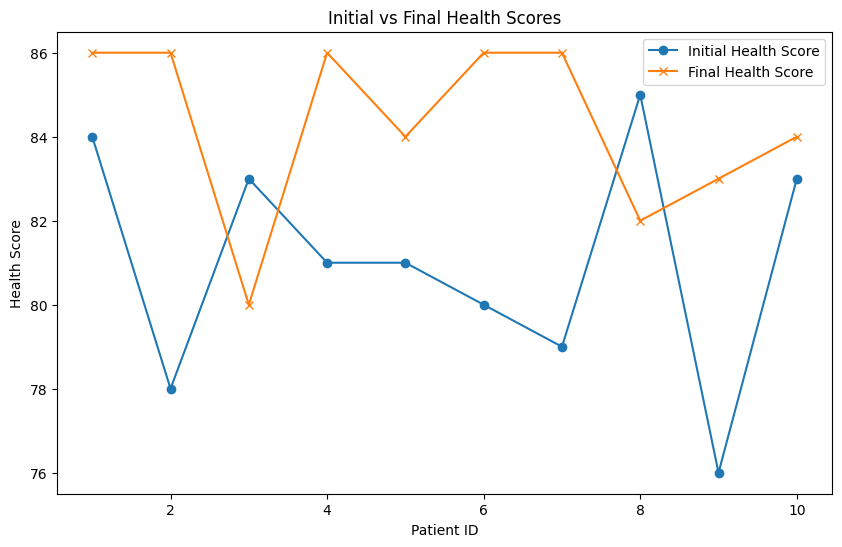

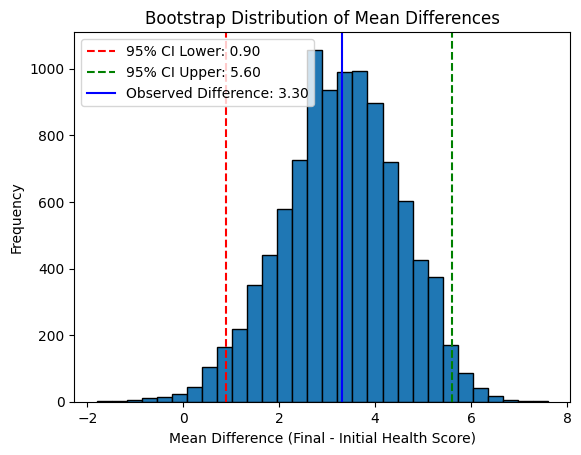

Observed Mean Difference: 3.30
95% Confidence Interval: (0.90, 5.60)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv('AliTech.csv')

# plot InitialHealthScore vs. FinalHealthScore
plt.figure(figsize=(10, 6))
plt.plot(data['PatientID'], data['InitialHealthScore'], label='Initial Health Score', marker='o')
plt.plot(data['PatientID'], data['FinalHealthScore'], label='Final Health Score', marker='x')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs Final Health Scores')
plt.legend()
plt.show()

import numpy as np

# calculate the observed mean difference
observed_diff = np.mean(data['FinalHealthScore'] - data['InitialHealthScore'])

# bootstrapping setup
n_iterations = 10000  # Number of bootstrap samples
bootstrap_diffs = np.empty(n_iterations)

# bootstrapping process
for i in range(n_iterations):
    # bootstrap sample with replacement
    bootstrap_sample = data.sample(frac=1, replace=True)
    
    # calculate the mean difference for this bootstrap sample
    bootstrap_diff = np.mean(bootstrap_sample['FinalHealthScore'] - bootstrap_sample['InitialHealthScore'])
    bootstrap_diffs[i] = bootstrap_diff

# calculate 95% confidence interval
ci_lower = np.percentile(bootstrap_diffs, 2.5)
ci_upper = np.percentile(bootstrap_diffs, 97.5)

# visualize bootstrap distribution
plt.hist(bootstrap_diffs, bins=30, edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'95% CI Lower: {ci_lower:.2f}')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'95% CI Upper: {ci_upper:.2f}')
plt.axvline(observed_diff, color='blue', linestyle='-', label=f'Observed Difference: {observed_diff:.2f}')
plt.xlabel('Mean Difference (Final - Initial Health Score)')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Differences')
plt.legend()
plt.show()

# report confidence interval and observed difference
print(f'Observed Mean Difference: {observed_diff:.2f}')
print(f'95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})')





The code start by visualizing the data to get an initial sense of the comparison between patients' initial and final health scores. (first graph), then we create a quantitative analysis using bootstrapping to estimate the difference in means between the initial and final health scores and determine if the observed improvement is statistically significant, and to see if 0 is within the confidence interval. The histogram above, (graph 2), shows the distribution of bootstrapped mean differences between final and initial health scores. The 95% confidence interval is represented by the red and green lines, and the observed mean difference is marked in blue.

### Findings and Discussion
Observed Difference: The observed difference between the final and initial health scores is the actual improvement seen in the sample. Bootstrapped Confidence Interval: The 95% confidence interval shows the range of plausible differences in the population. Since in this case the interval does not contain zero,as shown by the red line, we can conclude that the vaccine is very likely to have a positive effect.
I feel like a sample size of 10 patients is simply not adequate enough, even as a sample size for bootstraping, especially when it comes to medically related studies. What if all the positive patients are outliers, its much more likely for, say, 10 patients all to be outliers within the population to get selected than 100. 

## 9

Yes, I've often used chatbot for a different point of view, or a different explanation for questions or concepts I have a hard time understanding. 